In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import DataLoader   #包装可迭代的数据
import torch.utils.data as Data 

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

In [2]:
#画多个Roc曲线
#绘制多个模型的roc曲线
def pred_label_file(ROC_data,model,K_Model_Name):  #该函数将模型的预测结果和标签保存到csv文件中，最终一起画Roc曲线
    score_list=np.array([])
    label_list=np.array([])
    model.eval()
    with torch.no_grad():
        for X,y in ROC_data:
            X,y=X.to(device),y.to(device)
            pred=model(X)
            label=y.cpu().numpy()
            score=pred.cpu().numpy()
            label_list=np.append(label_list,values=label)
            score_list=np.append(score_list,values=score)
    df=pd.DataFrame({'label':label_list,'pred':score_list})
    s="K_pred/{0}.csv".format(K_Model_Name)
    df.to_csv(s,index=False,sep=',')
    
def Draw_roc(file1,file2,file3,file4,file5,file6,file7):   #根据模型文件来画ROC
    data1=pd.DataFrame(pd.read_csv(file1))
    data2=pd.DataFrame(pd.read_csv(file2))
    data3=pd.DataFrame(pd.read_csv(file3))
    data4=pd.DataFrame(pd.read_csv(file4))
    data5=pd.DataFrame(pd.read_csv(file5))
    data6=pd.DataFrame(pd.read_csv(file6))
    data7=pd.DataFrame(pd.read_csv(file7))
    
    fpr_file1,tpr_file1,threshold_file1 = roc_curve(list(data1["label"]), list(data1["pred"])) ###计算真正率和假正率
    roc_auc_file1=auc(fpr_file1,tpr_file1)###计算auc的值
    
    fpr_file2,tpr_file2,threshold_file2 = roc_curve(list(data2["label"]), list(data2["pred"])) ###计算真正率和假正率
    roc_auc_file2=auc(fpr_file2,tpr_file2)###计算auc的值
    
    fpr_file3,tpr_file3,threshold_file3 = roc_curve(list(data3["label"]), list(data3["pred"])) ###计算真正率和假正率
    roc_auc_file3=auc(fpr_file3,tpr_file3)###计算auc的值
    
    fpr_file4,tpr_file4,threshold_file4 = roc_curve(list(data4["label"]), list(data4["pred"])) ###计算真正率和假正率
    roc_auc_file4=auc(fpr_file4,tpr_file4)###计算auc的值
    
    fpr_file5,tpr_file5,threshold_file5 = roc_curve(list(data5["label"]), list(data5["pred"])) ###计算真正率和假正率
    roc_auc_file5=auc(fpr_file5,tpr_file5)###计算auc的值
    
    fpr_file6,tpr_file6,threshold_file6 = roc_curve(list(data6["label"]), list(data6["pred"])) ###计算真正率和假正率
    roc_auc_file6=auc(fpr_file6,tpr_file6)###计算auc的值
    
    fpr_file7,tpr_file7,threshold_file7 = roc_curve(list(data7["label"]), list(data7["pred"])) ###计算真正率和假正率
    roc_auc_file7=auc(fpr_file7,tpr_file7)###计算auc的值
    
    
    #font={'family':'Times New Roman','size':12}
    #sns.set(font_scale=1.2)
    #plt.rc('font',family-"Times New Roman")
    plt.figure()
    plt.figure(figsize=(6,6))
    plt.plot(fpr_file1, tpr_file1, color='grey', label='fold1 ROC curve (area = %0.3f)' % roc_auc_file1) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot(fpr_file2, tpr_file2, color='purple', label='fold2 ROC curve (area = %0.3f)' % roc_auc_file2) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot(fpr_file3, tpr_file3, color='blue', label='fold3 ROC curve (area = %0.3f)' % roc_auc_file3) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot(fpr_file4, tpr_file4, color='green', label='fold4 ROC curve (area = %0.3f)' % roc_auc_file4) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot(fpr_file5, tpr_file5, color='orange', label='fold5 ROC curve (area = %0.3f)' % roc_auc_file5) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot(fpr_file6, tpr_file6, color='red', label='fold6 ROC curve (area = %0.3f)' % roc_auc_file6) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot(fpr_file7, tpr_file7, color='#ef8a62', label='fold7 ROC curve (area = %0.3f)' % roc_auc_file7) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    #plt.savefig ("K_fold_ROC.png",dpi=300) 
    plt.show()
    

<Figure size 640x480 with 0 Axes>

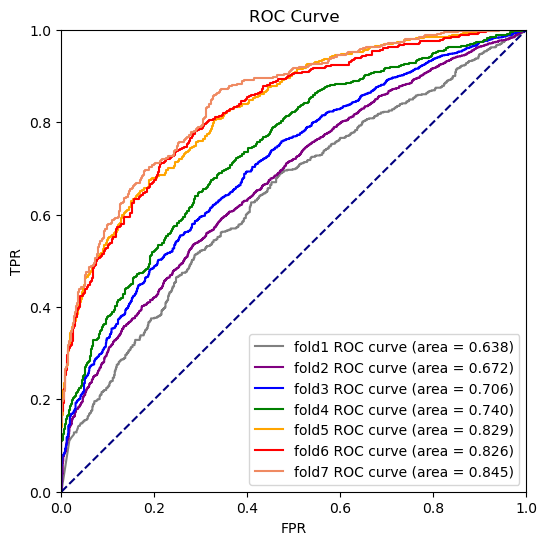

In [4]:
Draw_roc("1_K_corss.csv","2_K_corss.csv","3_K_corss.csv","4_K_corss.csv","5_K_corss.csv","6_K_corss.csv","7_K_corss.csv")